In [1]:
import konlpy

In [2]:
!pip install xmltodict

In [5]:
!pip install beautifulsoup4

In [8]:
url = 'http://apis.data.go.kr/1170000/law/lawSearchList.do?\
serviceKey=22Nn4Pf%2BappHSmLc8TsnR7KrSDh2oLZY%2BKUO%2Fk%2BAzsebJsWWxNqAafz3Y4c1t7SVy6SUTa2qvXNdbIwBzIvhrQ%3D%3D&\
target=law&query=*&numOfRows=10000&pageNo=1'

import requests
from bs4 import BeautifulSoup as bs
import xmltodict

In [9]:
# req = requests.get(url, headers=headers).content

req = requests.get(url).content
xmlobject = xmltodict.parse(req) # xml객체 생성
xmlobject['LawSearch']['law']# xml객체를 딕셔너리로 가져오기

[{'@id': '1',
  '법령일련번호': '232157',
  '현행연혁코드': '현행',
  '법령명한글': '10ㆍ27법난 피해자의 명예회복 등에 관한 법률',
  '법령약칭명': '10ㆍ27법난법',
  '법령ID': '010719',
  '공포일자': '20210518',
  '공포번호': '18146',
  '제개정구분명': '일부개정',
  '소관부처코드': '1371000',
  '소관부처명': '문화체육관광부',
  '법령구분명': '법률',
  '시행일자': '20210518',
  '자법타법여부': None,
  '법령상세링크': '/DRF/lawService.do?OC=sapphire_5&target=law&MST=232157&type=HTML&mobileYn=&efYd=20210518'},
 {'@id': '2',
  '법령일련번호': '235703',
  '현행연혁코드': '현행',
  '법령명한글': '10ㆍ27법난 피해자의 명예회복 등에 관한 법률 시행령',
  '법령약칭명': '10ㆍ27법난법시행령',
  '법령ID': '010831',
  '공포일자': '20210929',
  '공포번호': '32018',
  '제개정구분명': '타법개정',
  '소관부처코드': '1371000',
  '소관부처명': '문화체육관광부',
  '법령구분명': '대통령령',
  '시행일자': '20210929',
  '자법타법여부': None,
  '법령상세링크': '/DRF/lawService.do?OC=sapphire_5&target=law&MST=235703&type=HTML&mobileYn=&efYd=20210929'},
 {'@id': '3',
  '법령일련번호': '236231',
  '현행연혁코드': '현행',
  '법령명한글': '119구조ㆍ구급에 관한 법률',
  '법령약칭명': '119법',
  '법령ID': '011349',
  '공포일자': '20211019',
  '공포번호': '18487',
  '제개정구분명': '일부

In [10]:
import pandas as pd
import numpy as np
df = pd.DataFrame(xmlobject['LawSearch']['law']) # 데이터프레임 생성
df.head()

,@id,법령일련번호,현행연혁코드,법령명한글,법령약칭명,법령ID,공포일자,공포번호,제개정구분명,소관부처코드,소관부처명,법령구분명,시행일자,자법타법여부,법령상세링크
0,1,232157,현행,10ㆍ27법난 피해자의 명예회복 등에 관한 법률,10ㆍ27법난법,010719,20210518,18146,일부개정,1371000,문화체육관광부,법률,20210518,None,/DRF/lawService.do?OC=sapphire_5&target=law&MS...
1,2,235703,현행,10ㆍ27법난 피해자의 명예회복 등에 관한 법률 시행령,10ㆍ27법난법시행령,010831,20210929,32018,타법개정,1371000,문화체육관광부,대통령령,20210929,None,/DRF/lawService.do?OC=sapphire_5&target=law&MS...
2,3,236231,현행,119구조ㆍ구급에 관한 법률,119법,011349,20211019,18487,일부개정,1661000,소방청,법률,20220120,None,/DRF/lawService.do?OC=sapphire_5&target=law&MS...
3,4,236155,현행,119구조ㆍ구급에 관한 법률 시행령,119법시행령,011452,20211019,32070,일부개정,1661000,소방청,대통령령,20220106,None,/DRF/lawService.do?OC=sapphire_5&target=law&MS...
4,5,243963,현행,119구조ㆍ구급에 관한 법률 시행규칙,119법시행규칙,011457,20220721,00345,일부개정,1661000,소방청,행정안전부령,20220721,None,/DRF/lawService.do?OC=sapphire_5&target=law&MS...


In [11]:
target = df['법령명한글'].values # 시리즈를 배열로
title_list = target.tolist() # 리스트로 변환
text = ' '.join(title_list) # 'space'로 공백주고 리스트로 결합 
text

'10ㆍ27법난 피해자의 명예회복 등에 관한 법률 10ㆍ27법난 피해자의 명예회복 등에 관한 법률 시행령 119구조ㆍ구급에 관한 법률 119구조ㆍ구급에 관한 법률 시행령 119구조ㆍ구급에 관한 법률 시행규칙 1945년이후종전의규정에의한학교졸업자자격인정령 1959년 12월 31일 이전에 퇴직한 군인의 퇴직급여금지급에 관한 특별법 1959년 12월 31일 이전에 퇴직한 군인의 퇴직급여금지급에 관한 특별법 시행령 1980년해직공무원의보상등에관한특별조치법 1980년해직공무원의보상등에관한특별조치법시행령 1인 창조기업 육성에 관한 법률 1인 창조기업 육성에 관한 법률 시행령 2018 평창 동계올림픽대회 및 동계패럴림픽대회 지원 등에 관한 특별법 2018 평창 동계올림픽대회 및 동계패럴림픽대회 지원 등에 관한 특별법 시행령 2023 새만금 세계스카우트잼버리 지원 특별법 2023 새만금 세계스카우트잼버리 지원 특별법 시행령 2023 순천만국제정원박람회 지원 및 사후활용에 관한 특별법 2023 순천만국제정원박람회 지원 및 사후활용에 관한 특별법 시행령 2030 부산세계박람회 유치위원회의 설치 및 운영에 관한 규정 30개월 이상 복무한 상등병 만기전역자의 특별진급을 위한 특별법 30개월 이상 복무한 상등병 만기전역자의 특별진급을 위한 특별법 시행령 3ㆍ15의거 참여자의 명예회복 등에 관한 법률 3ㆍ15의거 참여자의 명예회복 등에 관한 법률 시행령 4ㆍ16세월호참사 진상규명 및 안전사회 건설 등을 위한 특별법 4ㆍ16세월호참사 진상규명 및 안전사회 건설 등을 위한 특별법 시행령 4ㆍ16세월호참사 피해구제 및 지원 등을 위한 특별법 4ㆍ16세월호참사 피해구제 및 지원 등을 위한 특별법 시행령 4차산업혁명위원회의 설치 및 운영에 관한 규정 5ㆍ18민주유공자예우 및 단체설립에 관한 법률 5ㆍ18민주유공자예우 및 단체설립에 관한 법률 시행령 5ㆍ18민주유공자예우 및 단체설립에 관한 법률 시행규칙 5ㆍ18민주화운동 관련자 보상 등에 관한 법률 5ㆍ18민주화운동 관련자 보상 등에 관한 법률

In [13]:
import re
text = re.sub('[^가-힣]+',' ',text) # 한글이 아닌 문자만 가져와서
print(len(text))
text[:100]

96156


' 법난 피해자의 명예회복 등에 관한 법률 법난 피해자의 명예회복 등에 관한 법률 시행령 구조 구급에 관한 법률 구조 구급에 관한 법률 시행령 구조 구급에 관한 법률 시행규칙 년이후'

In [16]:
from konlpy.tag import Okt

okt = Okt() # okt 객체 생성
morph = okt.pos(text) # pos 메서드 : 단어와 품사를 뽑아주는 함수
noun_list = []
for word, tag in morph:
    if (tag=='Noun') & (len(word) > 1): # 태그가 ''Noun' & len(word) 2개이상 len(word)=1 는 조사이기에 불필요 
        noun_list.append(word) # 의미가 있는 단어만 추출해서 noun_list에 저장

# print(morph)
print(noun_list)

['법난', '피해자', '명예', '회복', '법률', '법난', '피해자', '명예', '회복', '법률', '시행', '구조', '구급', '법률', '구조', '구급', '법률', '시행', '구조', '구급', '법률', '시행', '규칙', '이후', '종전', '규정', '학교', '졸업', '자격', '정령', '이전', '퇴직', '군인', '퇴직', '금지', '특별법', '이전', '퇴직', '군인', '퇴직', '금지', '특별법', '시행', '해직', '공무원', '보상', '특별', '조치', '해직', '공무원', '보상', '특별', '조치', '시행', '창조', '기업', '육성', '법률', '창조', '기업', '육성', '법률', '시행', '평창', '동계올림픽', '대회', '동계', '패럴림픽', '대회', '지원', '특별법', '평창', '동계올림픽', '대회', '동계', '패럴림픽', '대회', '지원', '특별법', '시행', '새만금', '세계', '스카우트', '잼버리', '지원', '특별법', '새만금', '세계', '스카우트', '잼버리', '지원', '특별법', '시행', '순천만', '국제', '정원', '박람회', '지원', '사후', '활용', '특별법', '순천만', '국제', '정원', '박람회', '지원', '사후', '활용', '특별법', '시행', '부산', '세계박람회', '유치', '위원회', '설치', '운영', '규정', '개월', '이상', '복무', '상등병', '전역', '특별', '진급', '특별법', '개월', '이상', '복무', '상등병', '전역', '특별', '진급', '특별법', '시행', '의거', '참여자', '명예', '회복', '법률', '의거', '참여자', '명예', '회복', '법률', '시행', '세월호', '참사', '진상', '규명', '안전', '사회', '건설', '특별법', '세월호', '참사', '진상', '규명', '안전', '사회'

In [17]:
# 조건에 맞춰 출력해보기
from collections import Counter
one_word = []
for word, tag in morph:
    if (tag == 'Noun') & (len(word)==1):
        one_word.append(word)
        
one_dict = dict(Counter(one_word).most_common())
keys = sorted(one_dict.items(), key=lambda x:x[1], reverse=True)
keys[:10]

[('관', 2398),
 ('령', 1496),
 ('법', 1450),
 ('및', 1257),
 ('등', 743),
 ('위', 146),
 ('그', 100),
 ('군', 37),
 ('제', 37),
 ('업', 36)]

In [19]:
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

count = Counter(noun_list)
data = dict(count.most_common())
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

# 반복되는 순위 정렬
df10 = df.sort_values(by='cnt', ascending=False)[:10]
df10.reset_index(inplace=True)
df10

,index,cnt
0,시행,2445
1,규칙,1754
2,법률,1481
3,관리,535
4,지원,364
5,규정,327
6,특별법,318
7,진흥,284
8,산업,276
9,운영,247


<AxesSubplot:xlabel='index', ylabel='cnt'>

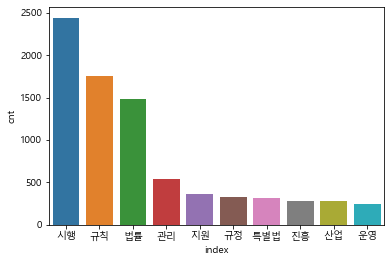

In [20]:
# 시각화
sns.barplot(x='index', y='cnt', data=df10, orient='v')

In [21]:
!pip install wordcloud

(-0.5, 1999.5, 1499.5, -0.5)

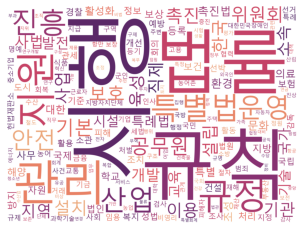

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=2000,height=1500).generate_from_frequencies(data)

plt.imshow(wordcloud)
plt.axis('off')

#### 과제 0722
관심있는 카테고리 text 데이터를 웹에서 가져와서 시각화하세요. (bar, wordcloud 등등)

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="뉴진스 : 네이버 통합검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'뉴진스'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'뉴진스'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>뉴진스 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220714.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic
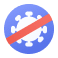
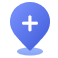
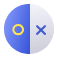
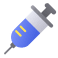

In [6]:
import requests
from bs4 import BeautifulSoup  #뷰티풀숩 모듈 활성화

response = requests.get("https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=blUw&qvt=0&query=뉴진스")

html_data = BeautifulSoup(response.text, 'html.parser') 
#'html.parser'방식으로 html을 파이썬에 불러옴, 변경된 html을 'html_data'로 정의

print(html_data)

In [8]:
import re
html_data = str(html_data)
text = re.sub('[^가-힣]+',' ',html_data) # 한글이 아닌 문자만 가져와서
print(len(text))
text[:100]

6069


' 뉴진스 네이버 통합검색 뉴진스 의 네이버 통합검색 결과입니다 뉴진스 의 네이버 통합검색 결과입니다 뉴진스 네이버 통합검색 뉴진스 뉴진스 메뉴 영역으로 바로가기 본문 영역으로 바로'

In [9]:
from konlpy.tag import Okt

okt = Okt() # okt 객체 생성
morph = okt.pos(text) # pos 메서드 : 단어와 품사를 뽑아주는 함수
noun_list = []
for word, tag in morph:
    if (tag=='Noun') & (len(word) > 1): # 태그가 ''Noun' & len(word) 2개이상 len(word)=1 는 조사이기에 불필요 
        noun_list.append(word) # 의미가 있는 단어만 추출해서 noun_list에 저장

# print(morph)
print(noun_list)

['뉴진스', '네이버', '통합', '검색', '뉴진스', '네이버', '통합', '검색', '결과', '뉴진스', '네이버', '통합', '검색', '결과', '뉴진스', '네이버', '통합', '검색', '뉴진스', '뉴진스', '메뉴', '영역', '바로가기', '본문', '영역', '바로가기', '검색', '검색어', '입력', '뉴진스', '뉴진스', '한글', '입력기', '네트워크', '상태', '입력기', '잠시', '다시', '시도', '자동', '완성', '레이어', '최근', '검색어', '전체', '삭제', '삭제', '검색어', '저장', '기능', '설정', '초기', '도움말', '확인', '최근', '검색어', '설정', '초기', '도움말', '확인', '도움말', '자동', '저장', '회차', '당첨번호', '추첨', '지급', '기한', '바로가기', '추가', '추가', '추가', '보기', '관심사', '반영', '텍스트', '자동', '완성', '도움말', '텍스트', '자동', '완성', '텍스트', '자동', '완성', '설정', '해당', '기기', '브라우저', '저장', '시간대', '연령', '남녀', '사용자', '그룹', '관심사', '자동', '완성', '제공', '로그인', '텍스트', '자동', '완성', '레이어', '도움말', '신고', '자동', '완성', '검색', '통합', '이미지', '지식', '플루', '동영상', '쇼핑', '뉴스', '어학', '사전', '지도', '보기', '도서', '뮤직', '지식', '오디오', '클립', '학술', '정보', '검색', '옵션', '통합', '검색', '공유', '통합', '검색', '뉴진스', '통합', '검색', '결과', '뉴진스', '검색', '옵션', '정렬', '관련', '최신', '기간', '전체', '시간', '개월', '개월', '개월', '직접', '입력', '옵션', '접기', '기간', '설정', '시작', '기간', 

In [10]:
# 조건에 맞춰 출력해보기
from collections import Counter
one_word = []
for word, tag in morph:
    if (tag == 'Noun') & (len(word)==1):
        one_word.append(word)
        
one_dict = dict(Counter(one_word).most_common())
keys = sorted(one_dict.items(), key=lambda x:x[1], reverse=True)
keys[:10]

[('전', 23),
 ('의', 17),
 ('어', 13),
 ('표', 10),
 ('일', 9),
 ('더', 8),
 ('새', 8),
 ('주', 6),
 ('키', 6),
 ('별', 5)]

In [12]:
import pandas as pd
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

count = Counter(noun_list)
data = dict(count.most_common())
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

# 반복되는 순위 정렬
df10 = df.sort_values(by='cnt', ascending=False)[:10]
df10.reset_index(inplace=True)
df10

,index,cnt
0,뉴진스,85
1,걸그룹,56
2,민희진,45
3,저장,43
4,공개,30
5,하이브,29
6,시간,26
7,바로가기,23
8,자동,23
9,완성,23


<AxesSubplot:xlabel='index', ylabel='cnt'>

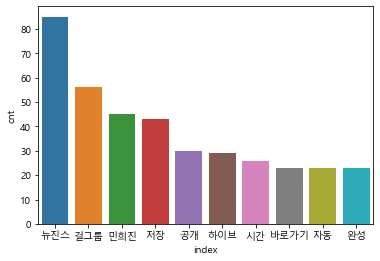

In [13]:
# 시각화
sns.barplot(x='index', y='cnt', data=df10, orient='v')

In [14]:
!pip install wordcloud

(-0.5, 1999.5, 1499.5, -0.5)

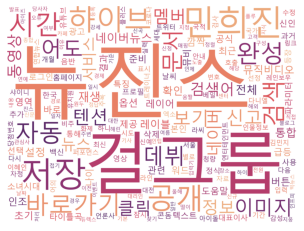

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=2000,height=1500).generate_from_frequencies(data)

plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
import requests
import re
# 정보를 가져올 URL 
url = 'https://news.naver.com/main/ranking/popularDay.naver'

# 서버가 접근자를 봇으로 인지하고 정보를 주지 않고 차단할 경우, header에 자신의 정보를 직접 전송한다.
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.3 Safari/605.1.15'}

# 입력한 URL 서버에서 HTML or XML 정보를 requests.models.Response 타입으로 가져오기 
response = requests.get(url, headers=headers)
print(type(response))  # requests.models.Response : HTML or XML 정보

# HTML or XML 정보를 가지고 있는 requests.models.Response 형식의 정보를 string 타입으로 변환
response = response.text
print(type(response))  # string

# 뉴스의 title 만 정규표현식을 이용하여 필터링
news_title = re.findall(r'rnknws(.+)</a>', response)
print(type(news_title))  # list

# 정규 표현식의 sub 함수를 사용하기 위하여 string 으로 타입 변환 
news_title = str(news_title)
print(type(news_title))  #string

# 문자와 숫자를 제와한 불필요한 정보 제거
news_title = re.sub('\W+', ' ', news_title)
news_title

In [ ]:
from konlpy.tag import Okt
# 한국어 전처리 package: konlpy에 있는 품사 토큰화 package: tag 중
# Okt class 의 pos() 함수를 사용하여 title 토큰화 
Okt = Okt()
morph_Okt = Okt.pos(news_title)
# print(morph_Okt)

# 토큰화한 결과에서 명사 추출
noun_list_Okt = []
for word, tag in morph_Okt:
    if (tag == 'Noun'):
        noun_list_Okt.append(word)
        
print(noun_list_Okt)